# Lab #2
#### Billy Parmenter - 7526387
## Part A

In [1]:
#imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from nltk.tokenize import word_tokenize

csv_path = '../../practical_labs/Lab2_dataset.csv'

In [2]:
def get_dirty_data():
  data = pd.read_csv(csv_path, header=0, names=['index','label', 'text', 'label_num'], index_col='index')
  data = data.sort_index()
  return data

In [3]:
def clean_text(text): 
  tokens = word_tokenize(text)
  # convert to lower case
  tokens = [w.lower() for w in tokens]
  # remove punctuation from each word
  import string
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]
  # remove remaining tokens that are not alphabetic
  words = [word for word in stripped if word.isalpha()]
  # filter out stop words
  from nltk.corpus import stopwords
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]
  return " ".join(words)

In [4]:
def get_clean_data():
  data = pd.read_csv(csv_path, header=0, names=['index','label', 'text', 'label_num'], index_col='index')
  data = data.sort_index()
  data['text'] = data['text'].apply(clean_text)
  return data

In [5]:
def evaluate_model(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  cr = classification_report(y_test, y_pred)

  accuracy = accuracy_score(y_test, y_pred)

  sns.heatmap(cm.T, square=True, annot=True, fmt='d')
  plt.xlabel('true label')
  plt.ylabel('predicted label');
  print(cr, "Accuracy: ", accuracy)

## Multinomial

In [6]:
def m_split_data(data):
  X = data['text']
  y = data['label']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [7]:

def m_fit_model(X_train, y_train):
  model = make_pipeline(TfidfVectorizer(), MultinomialNB())
  model.fit(X_train, y_train)
  return model

In [8]:

def multinomial_classification(data):
  X_train, X_test, y_train, y_test = m_split_data(data)
  m_model = m_fit_model(X_train, y_train)
  y_pred = m_model.predict(X_test)
  evaluate_model(y_test, y_pred)

              precision    recall  f1-score   support

         ham       0.83      1.00      0.91       718
        spam       1.00      0.53      0.70       317

    accuracy                           0.86      1035
   macro avg       0.91      0.77      0.80      1035
weighted avg       0.88      0.86      0.84      1035
 Accuracy:  0.8570048309178744


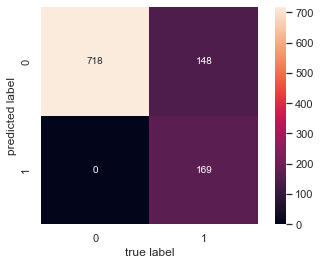

In [9]:
dirty_data = get_dirty_data()
multinomial_classification(dirty_data)


              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       718
        spam       1.00      0.71      0.83       317

    accuracy                           0.91      1035
   macro avg       0.94      0.85      0.88      1035
weighted avg       0.92      0.91      0.91      1035
 Accuracy:  0.9101449275362319


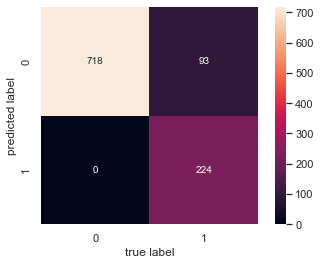

In [10]:

clean_data = get_clean_data()
multinomial_classification(clean_data)


## Gaussian

In [11]:
def g_split_data(data):
  matrix = CountVectorizer(max_features=1000)
  X = matrix.fit_transform(data['text']).toarray()
  y = data.iloc[:, 0]
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  
  return X_train, X_test, y_train, y_test

In [12]:
def g_fit_model(X_train, y_train):
  model = GaussianNB()
  model.fit(X_train, y_train)
  return model

In [13]:
def gaussian_classification(data):
  X_train, X_test, y_train, y_test = g_split_data(data)
  g_model = g_fit_model(X_train, y_train)
  y_pred = g_model.predict(X_test)
  evaluate_model(y_test, y_pred)

              precision    recall  f1-score   support

         ham       0.99      0.94      0.97       939
        spam       0.87      0.97      0.91       354

    accuracy                           0.95      1293
   macro avg       0.93      0.96      0.94      1293
weighted avg       0.95      0.95      0.95      1293
 Accuracy:  0.9505027068832174


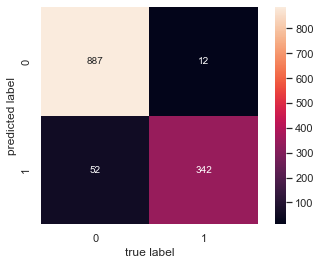

In [14]:
dirty_data = get_dirty_data()
gaussian_classification(dirty_data)

              precision    recall  f1-score   support

         ham       0.99      0.93      0.96       944
        spam       0.84      0.98      0.90       349

    accuracy                           0.94      1293
   macro avg       0.92      0.95      0.93      1293
weighted avg       0.95      0.94      0.95      1293
 Accuracy:  0.9443155452436195


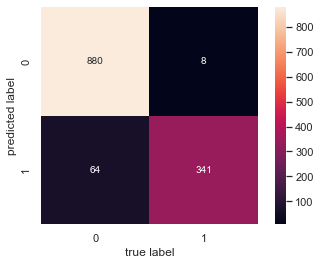

In [15]:
clean_data = get_clean_data()
gaussian_classification(clean_data)